### Práctica 24-1 RNA: Clasificación de dígitos manuscritos con una RNA clásica

En esta práctica trabajaremos la clasificacion de digitos manuscritos mediante una RNA clásica y observaremos la\
dependencia respecto de la ubicación del dígito sobre el marco de la imagen.
Utilizaremos el dataset MNIST que contiene 60.000 imagenes de 28x28x1. 
De estas, 50.000 las utilizaremos para entrenamiento y 10.000 para prueba.

El código se ha comentado para contextualizar cada instrucción.

----------------------------------------------------------------------------------
Respecto del apartado de compilación del modelo hay que aclarar que:\
- El proceso de compilación prepara el modelo para que se pueda entrenar correctamente.\
- Define la estrategia que el modelo seguirá para aprender a partir de los datos de entrenamiento.\
- Sin la compilación, Keras no sabría qué optimizador usar ni cómo evaluar el error durante el entrenamiento.\
- Una vez que el modelo está compilado, podemos proceder con el entrenamiento del modelo.\
- Debemos especificar el optimizador a utilizar, la función de pérdida y las métricas a evaluar.\

El optimizador es el algoritmo que ajusta los pesos de la red para minimizar la función de pérdida durante el entrenamiento:\

Alternativas para "optimice":\
'adam' (Adaptive Moment Estimation) es uno de los más usados por su rapidez y buen desempeño general.

'sgd': Gradiente descendente clásico (stochastic gradient descent).

'rmsprop': Bueno para RNNs.

'adagrad', 'adadelta', 'nadam': Variaciones adaptativas.


La función de pérdida mide el error entre las predicciones del modelo y las etiquetas reales. El objetivo es minimizar esta pérdida durante el entrenamiento.

Alternativas para "loss":\
'sparse_categorical_crossentropy': Se usa para clasificación multiclase cuando las etiquetas son enteros (0,1,2...) 

'categorical_crossentropy': Para clasificación multiclase con etiquetas en one-hot encoding.

'binary_crossentropy': Para clasificación binaria (0 o 1).

'mean_squared_error', 'mean_absolute_error': Para regresión.

'hinge': Para clasificación tipo SVM.


La métrica permite evaluar el rendimiento del modelo durante el entrenamiento y evaluación.

Alternativas para "metrics":\
'accuracy': porcentaje de predicciones correctas.

'mae': Error absoluto medio (útil en regresión).

'mse': Error cuadrático medio.

'Precision', 'Recall', 'AUC': Métricas más específicas para clasificación.

Tamaño del conjunto de entrenamiento: (60000, 28, 28)
Tamaño del conjunto de prueba: (10000, 28, 28)


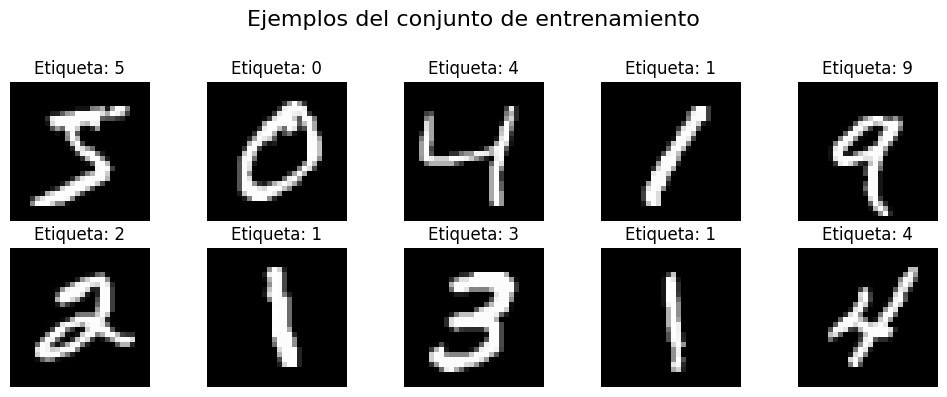


Entrenando el modelo...
Epoch 1/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8726 - loss: 0.4562 - val_accuracy: 0.9640 - val_loss: 0.1355
Epoch 2/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9606 - loss: 0.1328 - val_accuracy: 0.9727 - val_loss: 0.0947
Epoch 3/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9749 - loss: 0.0862 - val_accuracy: 0.9740 - val_loss: 0.0832
Epoch 4/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9808 - loss: 0.0631 - val_accuracy: 0.9793 - val_loss: 0.0715
Epoch 5/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9850 - loss: 0.0485 - val_accuracy: 0.9772 - val_loss: 0.0741

Evaluando el modelo en el conjunto de prueba:
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9764 - loss: 0.0813
Precisión en el conjunto de prueba: 97.82%
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


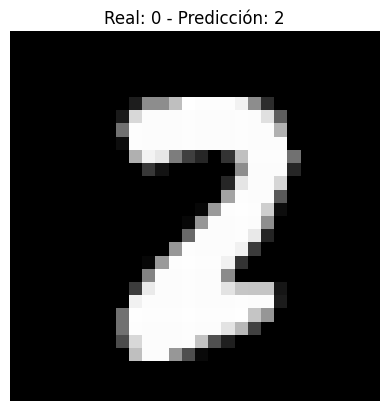

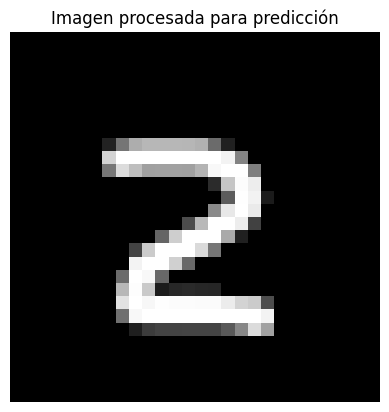

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
✍️ Predicción del modelo: 2


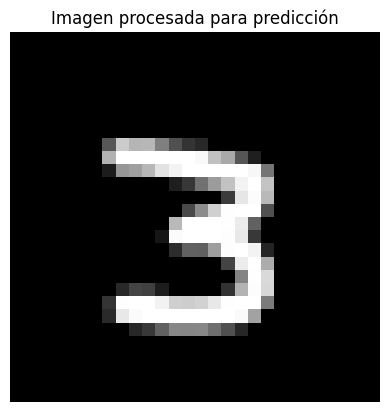

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
✍️ Predicción del modelo: 3


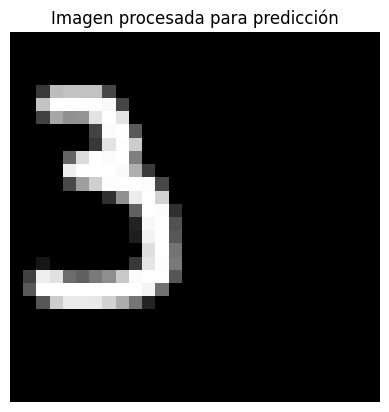

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
✍️ Predicción del modelo: 4


In [ ]:
# Importamos las librerías necesarias
import numpy as np
import matplotlib.pyplot as plt
import random
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Input

import tkinter as tk  # Biblioteca estándar de Python para crear interfaces gráficas de usuario
from PIL import Image, ImageDraw # Librería muy potente para el procesamiento de imágenes 


# Cargamos el dataset MNIST desde Keras
# MNIST contiene imágenes de dígitos manuscritos (0-9) con sus etiquetas correspondientes
(x_train, y_train), (x_test, y_test) = mnist.load_data()

print("Tamaño del conjunto de entrenamiento:", x_train.shape)
print("Tamaño del conjunto de prueba:", x_test.shape)

# Mostramos algunas imágenes
plt.figure(figsize=(10, 4))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(x_train[i], cmap='gray')
    plt.title(f"Etiqueta: {y_train[i]}")
    plt.axis('off')
plt.tight_layout()
plt.suptitle("Ejemplos del conjunto de entrenamiento", fontsize=16)
plt.subplots_adjust(top=0.8)
plt.show()

# Normalizamos los valores de los píxeles para que estén en el rango [0, 1]
# Esto mejora el rendimiento del entrenamiento
# Dividimos por 255 porque los valores de los píxeles están en el rango [0, 255]
x_train = x_train / 255.0
x_test = x_test / 255.0

#y_train = to_categorical(y_train, 10)
#y_test = to_categorical(y_test, 10)

# Definimos el modelo
model = Sequential([
    Input(shape=(28, 28)),         # Definimos explícitamente la forma de entrada con Input
    Flatten(),                     # Aplana la imagen 28x28 a un vector de 784 valores
    Dense(128, activation='relu'),# Capa oculta con 128 neuronas y activación ReLU
    Dense(10, activation='softmax') # Capa de salida con 10 neuronas (una por dígito)
])

# Compilamos el modelo
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Entrenamos el modelo
print("\nEntrenando el modelo...")
model.fit(x_train, y_train, epochs=5, batch_size=32, validation_split=0.1)

# Evaluamos el modelo
print("\nEvaluando el modelo en el conjunto de prueba:")
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f"Precisión en el conjunto de prueba: {test_accuracy*100:.2f}%")

# Seleccionamos una imagen al azar
indice = random.randint(0, len(x_test) - 1)

imagen = x_test[indice]
etiqueta_real = np.argmax(y_test[indice])

# Hacemos una predicción con la imagen seleccionada
prediccion = model.predict(imagen.reshape(1, 28, 28))
etiqueta_predicha = np.argmax(prediccion)

# Mostramos la imagen y el resultado
plt.imshow(imagen, cmap='gray')
plt.title(f"Real: {etiqueta_real} - Predicción: {etiqueta_predicha}")
plt.axis('off')
plt.show()

#---------------------------------------------------------------------------
# Creamos una ventana donde escribir con el ratón un digito

# Clase para la ventana de dibujo
class DigitoDibujado:
    def __init__(self, modelo):
        self.modelo = modelo
        self.ventana = tk.Tk()
        self.ventana.title("Dibuja un dígito (0-9)")
        
        # Crear lienzo de dibujo
        self.canvas = tk.Canvas(self.ventana, width=200, height=200, bg="black")
        self.canvas.pack()
        
        # Imagen PIL donde se guardará el dibujo
        self.imagen = Image.new("L", (200, 200), color=0)
        self.draw = ImageDraw.Draw(self.imagen)

        # Eventos de dibujo
        self.canvas.bind("<B1-Motion>", self.dibujar)
        
        # Botón para predecir el dígito
        btn_predecir = tk.Button(self.ventana, text="Predecir", command=self.predecir)
        btn_predecir.pack()

        # Botón para limpiar el dibujo
        btn_limpiar = tk.Button(self.ventana, text="Limpiar", command=self.limpiar)
        btn_limpiar.pack()

        self.ventana.mainloop()

    def dibujar(self, evento):
        # Dibuja un círculo blanco donde se arrastra el ratón
        x, y = evento.x, evento.y
        radio = 8
        self.canvas.create_oval(x - radio, y - radio, x + radio, y + radio, fill="white", outline="white")
        self.draw.ellipse([x - radio, y - radio, x + radio, y + radio], fill=255)

    def predecir(self):
        # Redimensionamos la imagen a 28x28
        imagen_redimensionada = self.imagen.resize((28, 28), Image.LANCZOS)

        imagen_np = np.array(imagen_redimensionada)

        # Aplicamos umbral para quitar ruido
        imagen_np = np.where(imagen_np > 20, imagen_np, 0)

        # Normalizamos a rango [0, 1]
        imagen_np = imagen_np / 255.0

        # Mostramos la imagen procesada para ver cómo la recibe el modelo
        plt.imshow(imagen_np, cmap='gray')
        plt.title("Imagen procesada para predicción")
        plt.axis('off')
        plt.show()

        # Redimensionamos para que el modelo pueda procesarla (batch, alto, ancho)
        imagen_np = imagen_np.reshape(1, 28, 28)

        # Predicción
        prediccion = self.modelo.predict(imagen_np)
        etiqueta = np.argmax(prediccion)
        print(f"✍️ Predicción del modelo: {etiqueta}")


    def limpiar(self):
        # Limpia el lienzo y la imagen
        self.canvas.delete("all")
        self.imagen = Image.new("L", (200, 200), color=0)
        self.draw = ImageDraw.Draw(self.imagen)

# Iniciar la ventana de dibujo
DigitoDibujado(model)

